

 ******** GENERATING GRAPH ********
LAYERS = [1, 2, 2, 4, 1]
adding 7 to 4
from node 00: [[1, 5], [2, 21]]
from node 01: [[3, 5], [4, 8]]
from node 02: [[4, 36]]
from node 03: [[5, 8], [6, 4], [7, 13], [8, 35]]
from node 04: [[6, 2], [8, 38]]
from node 05: [[9, 17]]
from node 06: [[9, 12]]
from node 07: [[9, 5], [4, 37]]
from node 08: [[9, 40]]
from node 09: []

 ******** PERFORMING EDMONDS-KARP ALGORTIHM ********

 ********************** DEBUG **********************
FLOW = [[0, 5, 21, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 21, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 19, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 19], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


 ******** PERFORMING FLOW VALIDITY CHECK ********
FLOW FINAL = [[0, 5, 21, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 21, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0]

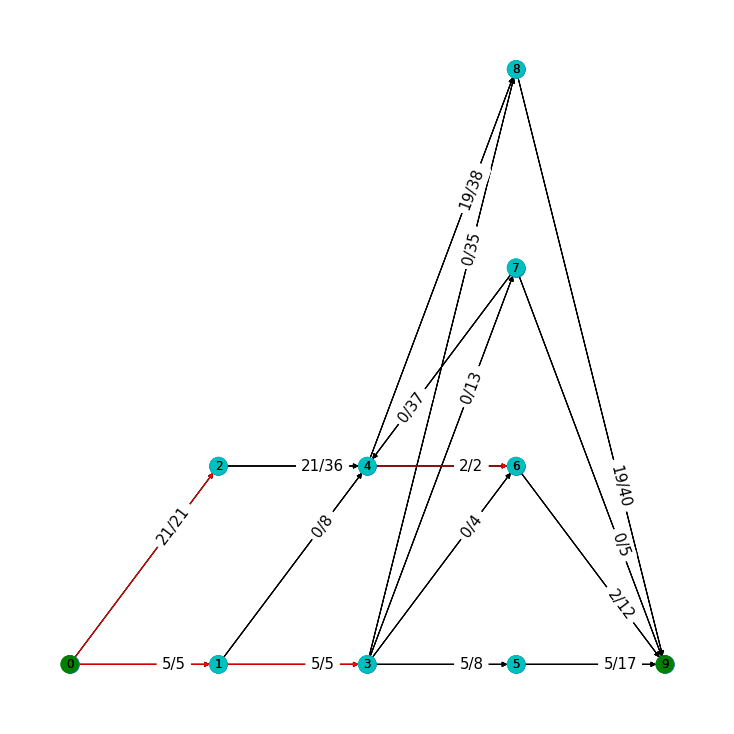

In [37]:
import random as rd
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

import copy


MAX_LAYERS = 3          # defines max number of layers in the graph
MAX_SIZE_LAYERS = 4     # defines max size for each layer in the graph
MAX_CAPACITY = 40       # defines the max capacity of an edge
EDGE_DENSITY_FORWARD = 0.5   # defines the forward edge density at each layer
EDGE_DENSITY_BACKWARDS = 0.2 # defines the backwards edge density at each layer
EDGE_DENSITY_SIDE = 0.2      # defines the side edge density at each layer

LAYERS = [rd.randint(2,MAX_SIZE_LAYERS) if 0<i<=MAX_LAYERS else 1 for i in range(MAX_LAYERS+2)]
NODES = sum(LAYERS)                          
INFINITY = math.inf     

# function that computes with BFS the shortest path from start_node to end_node
# and returns the corresponding path as a list of nodes 
def BFS_search(g):
    start_node = 0
    end_node = NODES - 1
    # Initialize dictionary that tracks predecessor to discovered node in BFS
    preds = {start_node: None}  # start node has no predecessor
    def BFS(g, start, pred_dict):
        explored = [start]  # start node is explored initially as 1st level 
        while len(explored) > 0:
            # Initialize list to store newly discovered nodes at subsequent 
            # level (nodes adjacent to nodes in explored list)
            neighbours_to_explored = [] 

            # Find all adjacent nodes to already explored nodes   
            for explored_node in explored:
                for edge in g[explored_node]: 
                    if edge[0] not in pred_dict:   # node is unexplored
                        pred_dict[edge[0]] = explored_node, edge[1]  # add node as key and its parent, residual capacity of edge as value pair
                        neighbours_to_explored.append(edge[0]) 
            explored = neighbours_to_explored  # assign newly discovered nodes as current set of explored nodes 
    
    BFS(g, start_node, preds)
    # for k, v in preds.items():
    #     print(k, v)
    
    path = [] 
    # Construct list of edges starting from end node, moving 
    # along its predecessors until we hit the start node
    if end_node in preds:   # end_node is explored
        end = end_node
        while end != start_node:
            pred, res_cap = preds[end]
            path.append([pred, end, res_cap])
            end = pred
                  
    return path[::-1]   # return ordered path from start to end nodes by reversing it


# function that returns the residual graph from the input graph
def build_residual_graph(g,flow):
    # r_graph = copy.deepcopy(g)
    r_graph = [[] for i in range(NODES)]    # initialize an empty graph of the same size as input
    for idx, edgelist in enumerate(g):
        if edgelist:
            for edge in edgelist:   # edge is a list of its end node, capacity
                res_cap = edge[1] - flow[idx][edge[0]]  # compute residual capacity of edge
                if res_cap > 0: # if residual capacity of edge is positive, add as forward edge in residual graph
                    r_graph[idx].append([edge[0], res_cap])
                if flow[idx][edge[0]] > 0:  # if flow of edge is positive, add a backward edge in residual graph
                    r_graph[edge[0]].append([idx, -flow[idx][edge[0]]])
              
    return r_graph


# function that implements the Edmonds Karp algorithm to find max-flow of a network graph
def edmonds_karp(g):
    flow = [[0 for i in range(NODES)] for j in range(NODES)] 
    while True:
        res_graph = build_residual_graph(g, flow)
        aug_path = BFS_search(res_graph)

        if aug_path:
            # print("Augmenting path:", aug_path)
            # compute residual capacity of augmenting path 
            min_cap = INFINITY
            for edge in aug_path:
                if abs(edge[2]) < min_cap: min_cap = abs(edge[2])

            # Augment flow along path by its residual capacity
            for edge in aug_path:
                if edge[2] > 0: # residual capacity is positive i.e. forward edge
                    flow[edge[0]][edge[1]] = flow[edge[0]][edge[1]] + min_cap
                if edge[2] < 0: # residual capacity is negative i.e. backward edge
                    flow[edge[1]][edge[0]] = flow[edge[1]][edge[0]] - min_cap
        else:
            break   # no augmenting path so we terminate and return current flow as max flow

    print("\n ********************** DEBUG **********************")
    print("FLOW = " + str(flow))
    print("")
  
    return flow


# function that creates the graph
def make_graph():
    
    print("LAYERS = " + str(LAYERS))
    g = [[] for i in range(len(LAYERS)) for j in range(LAYERS[i])]
    
    for n_out in range(LAYERS[1]): g[0].append([1+n_out, rd.randint(1,MAX_CAPACITY)])
    for n_in in range(LAYERS[-2]): g[len(g)-1+n_in-LAYERS[-2]].append([len(g)-1, rd.randint(1,MAX_CAPACITY)])
    
    start_index = 1
    for l in range(1,MAX_LAYERS):
        for n_in in range(LAYERS[l]):
            for n_out in range(LAYERS[l+1]):
                to_add = (MAX_SIZE_LAYERS*MAX_SIZE_LAYERS-LAYERS[l]*LAYERS[l+1])*(1-EDGE_DENSITY_FORWARD)/(MAX_SIZE_LAYERS*MAX_SIZE_LAYERS)
                if rd.uniform(0, 1)<EDGE_DENSITY_FORWARD+to_add: g[start_index+n_in].append([start_index+LAYERS[l]+n_out, rd.randint(1,MAX_CAPACITY)])
            
            if n_in!=LAYERS[l] and rd.uniform(0, 1)<EDGE_DENSITY_SIDE: 
                if rd.uniform(0, 1)<0.5: g[start_index+n_in].append([start_index+n_in+1, rd.randint(1,MAX_CAPACITY)])
                else: g[start_index+n_in+1].append([start_index+n_in, rd.randint(1,MAX_CAPACITY)])
                
        for n_in in range(LAYERS[l]):
            for n_out in range(LAYERS[l+1]):
                if rd.uniform(0, 1)<EDGE_DENSITY_BACKWARDS: 
                    found = False
                    for j in range(len(g[start_index+n_in])): 
                        if g[start_index+n_in][j][0] == start_index+LAYERS[l]+n_out:                        
                            found = True
                            break
                    if not found: 
                        print("adding "+str(start_index+LAYERS[l]+n_out)+" to " +str(start_index+n_in))
                        g[start_index+LAYERS[l]+n_out].append([start_index+n_in, rd.randint(1,MAX_CAPACITY)])
    
        start_index = start_index + LAYERS[l]

    return g
 

# function that prints the graph
def print_graph(g,flow):
    G = nx.DiGraph()
    for i in range(len(g)): G.add_node(i)
    for i in range(len(g)):
        for j in range(len(g[i])): G.add_edge(i,g[i][j][0],capacity=g[i][j][1], my_flow=flow[i][g[i][j][0]])
    for i in range(len(g)): print("from node %02i: " %(i) + str(g[i]))
    
    pos = []
    [pos.append(np.array([1.5*i, j])) for i in range(len(LAYERS)) for j in range(LAYERS[i])]
    nx.draw(G,pos, with_labels=True)
    
    colors =['r' if d['my_flow']==d['capacity'] else 'k' for u,v,d in G.edges(data=True)]  
    nx.draw_networkx_edges(G,pos,edge_color=colors)       
    labels=dict( [( (u,v,), (str(d['my_flow'])+"/"+str(d['capacity'])) ) for u,v,d in G.edges(data=True)] )
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size=15, label_pos=0.3)
    
    colors =['c' for u in G.nodes()]  
    colors[0]=colors[NODES-1]='g'
    nx.draw_networkx_nodes(G,pos,node_color=colors)
   
    
# function that checks the validity of a flow    
def check_flow_validity(g,flow):
    for i in range(len(g)): 
        for j in range(len(g[i])): 
            if g[i][j][1] < flow[i][g[i][j][0]]: 
                print("Flow impossible at edge (" + str(i) + "," + str(g[i][j][0]) + ")")
                return False
    
    return True
    

print("\n\n ******** GENERATING GRAPH ********" )     
g = make_graph()
flow = [[0 for i in range(NODES)] for j in range(NODES)]
plt.figure(1,figsize=(10,10))
print_graph(g,flow)

print("\n ******** PERFORMING EDMONDS-KARP ALGORTIHM ********" )    
flow = edmonds_karp(g)

print("\n ******** PERFORMING FLOW VALIDITY CHECK ********" )    
if check_flow_validity(g,flow): 
    print("FLOW FINAL = " + str(flow))
    print("FLOW VALUE = " + str(sum([flow[0][g[0][i][0]] for i in range(len(g[0]))]  )))
else: print("Invalid flow !")
    
plt.figure(1,figsize=(10,10))
print_graph(g,flow)


In [3]:
print(g)

[[[1, 16], [2, 24]], [[3, 16], [4, 1], [5, 8]], [[3, 9], [4, 6], [5, 40]], [[6, 5], [7, 2]], [[5, 19]], [[6, 38], [7, 24], [8, 25], [6, 1]], [[9, 28]], [[9, 30]], [[9, 25]], []]
